#Introduction

The purpose of this analysis is to take a look at each teams record and at their basic offensive production and playstyle. We will do this by examining yards gained per throw attempt and rush attempt and by examining how often each team runs or throws the ball.

In [ ]:
!pip install nfl_data_py


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Subset the 2022 Season
pbp2022 = nfl.import_pbp_data([2022])

2022 done.
Downcasting floats.


In [ ]:
#Subset the 2023 Season
pbp2023 = nfl.import_pbp_data([2023])

2023 done.
Downcasting floats.


In [ ]:
#Define a list of my teams
teams = ['CIN', 'IND', 'KC', 'NE', 'PHI', 'MIN', 'NO', 'ARI']

#Teams Analysis in 2022

##Records

In [ ]:
df2022 = nfl.import_schedules([2022])

def Record(teams, df):

  Record = pd.DataFrame({
    'Team': [],
    'Wins': [],
    'Losses': []
  })


  for team in teams:
    team_df = df[(df['home_team'] == team) | (df['away_team'] == team)]

    wins = 0
    losses = 0

    for index, row in team_df.iterrows(): # iterate over each row in df

      if row['home_team'] == team:

        if row['home_score'] > row['away_score']: # is home score > away?

          wins +=1

        else:

          losses +=1 # if not, add L

      else:

        if row['away_score'] > row['home_score']: # is away score greater than home?
          wins +=1 # if so, add w

        else:
          losses +=1 # if not, add L

    new_row = pd.DataFrame([[team, wins, losses]], columns=['Team', 'Wins', 'Losses'])
    Record = pd.concat([Record, new_row], ignore_index=True)

  return Record

Record(teams, df2022)

,Team,Wins,Losses
0,CIN,14.0,5.0
1,IND,4.0,13.0
2,KC,17.0,3.0
3,NE,8.0,9.0
4,PHI,16.0,4.0
5,MIN,13.0,5.0
6,NO,7.0,10.0
7,ARI,4.0,13.0


The Bengals had a great season, but lost in the AFC championship. The Colts had an abysmal season. The Chiefs won the superbowl. The Patriots finished one game below .500. The Eagles lost in the Superbowl. The Vikings lost in the playoffs after a good season. The Saints had a below average season with 7 wins. And the Cardinals had a terrible season.

##Yards Gained per Passing Attempt

<ipython-input-6-2b5ce0586734>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  meanPassYards = pd.concat([meanPassYards, new_row], ignore_index=True)
<ipython-input-6-2b5ce0586734>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Team', y = 'YPT', data = YPT, palette= 'BuPu')


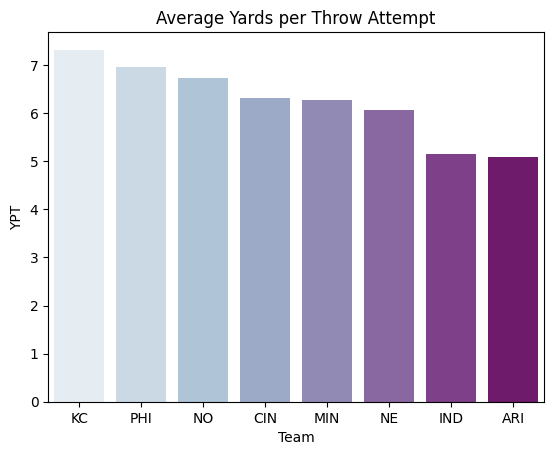

,Team,YPT
2,KC,7.317721
4,PHI,6.968703
6,NO,6.720000
0,CIN,6.317889
5,MIN,6.264474
3,NE,6.068611
1,IND,5.146926
7,ARI,5.093969


In [ ]:

# Average Passing Yards per Attempt
def YardsPerThrow(teams, season):
  meanPassYards = pd.DataFrame({
    'Team': [],
    'YPT': []
  })

  for team in teams:
    teamPassPlays = season[(season['posteam'] == team) & (season['play_type'] == 'pass')]
    avgYPT = teamPassPlays['yards_gained'].mean()
    new_row = pd.DataFrame([[team, avgYPT]], columns=['Team', 'YPT'])
    meanPassYards = pd.concat([meanPassYards, new_row], ignore_index=True)

  return meanPassYards.sort_values(by = "YPT", ascending = False)

YPT = YardsPerThrow(teams, pbp2022)

sns.barplot(x = 'Team', y = 'YPT', data = YPT, palette= 'BuPu')
plt.title('Average Yards per Throw Attempt')
plt.show()

YPT



The Chiefs have the most effective pass game with an average gain of 7.3 yards per throw. This is can probably be explained by Patrick Mahomes. The worst passing game of my teams is the Cardinals who have an average gain of 5 yards per throw.

##Yards Gained per Rushing Attempt

<ipython-input-7-8cbff2875ec8>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  meanRushYards = pd.concat([meanRushYards, new_row], ignore_index=True)
<ipython-input-7-8cbff2875ec8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='YPR', data=YPR, palette='Spectral')


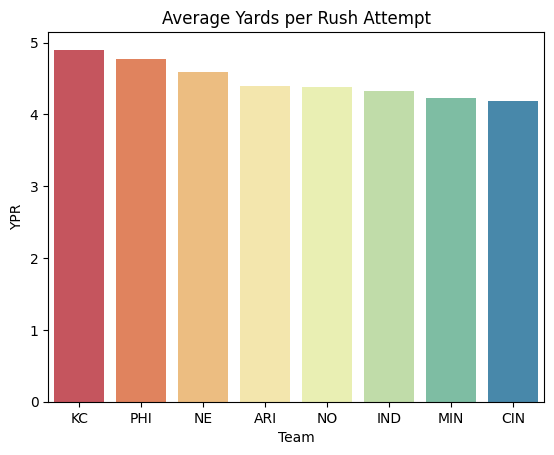

,Team,YPR
2,KC,4.901467
4,PHI,4.777605
3,NE,4.595533
7,ARI,4.391608
6,NO,4.384615
1,IND,4.332563
5,MIN,4.231707
0,CIN,4.180995


In [ ]:
# Average Yards per Rush Attempt
def YardsPerRush(teams, season):
  meanRushYards = pd.DataFrame({
    'Team': [],
    'YPR': []
  })

  for team in teams:
    teamRunPlays = season[(season['posteam'] == team) & (season['play_type'] == 'run')]
    avgYPR = teamRunPlays['yards_gained'].mean()
    new_row = pd.DataFrame([[team, avgYPR]], columns=['Team', 'YPR'])
    meanRushYards = pd.concat([meanRushYards, new_row], ignore_index=True)

  return meanRushYards.sort_values(by = "YPR", ascending = False)

YPR = YardsPerRush(teams, pbp2022)

sns.barplot(x='Team', y='YPR', data=YPR, palette='Spectral')
plt.title('Average Yards per Rush Attempt')
plt.show()

YPR

Along with having a great passing game, the Chiefs had a dominant run game. This probably explains why they won the Superbowl. The Eagles weren't far behind the Chiefs, and that might be the reason they made it to the Superbowl.

##Play Type Percentage

In [ ]:
def PlayTypePercentage(teams, season):
    PassPlayFrequency = pd.DataFrame({
    'Team': [],
    'Pass Play Frequency': [],
    'Run Play Frequency': []
  })

    for team in teams:
        teamPassPlays = season[(season['posteam'] == team)]
        passPercentage = len(teamPassPlays[teamPassPlays['play_type'] == 'pass']) / len(teamPassPlays)
        runPercentage = len(teamPassPlays[teamPassPlays['play_type'] == 'run']) / len(teamPassPlays)
        new_row = pd.DataFrame([[team, passPercentage, runPercentage]], columns=['Team', 'Pass Play Frequency', 'Run Play Frequency'])
        PassPlayFrequency = pd.concat([PassPlayFrequency, new_row], ignore_index=True)

    return PassPlayFrequency.sort_values(by = "Pass Play Frequency", ascending = False)

PlayTypePercentage(teams, pbp2022)


,Team,Pass Play Frequency,Run Play Frequency
5,MIN,0.486867,0.262652
0,CIN,0.480222,0.273177
7,ARI,0.479489,0.288500
2,KC,0.478208,0.288741
1,IND,0.467414,0.303434
3,NE,0.438346,0.303008
6,NO,0.412603,0.341335
4,PHI,0.389437,0.373186


Through this dataframe you can see the playstyle of each team. The Vikings were a very pass heavy team, while the Eagles were a very run heavy offense.

##

#Teams Analysis in 2023

##Records

In [ ]:
df2023 = nfl.import_schedules([2023])

Record(teams, df2023)

,Team,Wins,Losses
0,CIN,9.0,8.0
1,IND,9.0,8.0
2,KC,15.0,6.0
3,NE,4.0,13.0
4,PHI,11.0,7.0
5,MIN,7.0,10.0
6,NO,9.0,8.0
7,ARI,4.0,13.0


One team that improved from 2022 was the Colts. The Chiefs although there record worsen won the Superbowl. The Bengals took a big step back from 2022.

##Yards Gained per Passing Attempt

<ipython-input-6-2b5ce0586734>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  meanPassYards = pd.concat([meanPassYards, new_row], ignore_index=True)
<ipython-input-15-b135f7775f40>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Team', y = 'YPT', data = YPT, palette= 'BuPu')


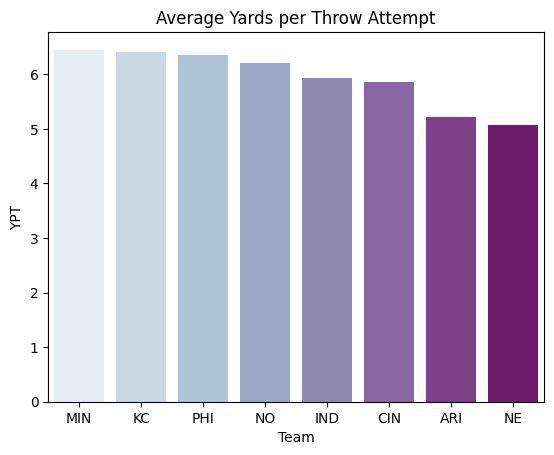

,Team,YPT
5,MIN,6.451183
2,KC,6.404908
4,PHI,6.346334
6,NO,6.211509
1,IND,5.925807
0,CIN,5.860150
7,ARI,5.222591
3,NE,5.072727


In [ ]:
YPT = YardsPerThrow(teams, pbp2023)

sns.barplot(x = 'Team', y = 'YPT', data = YPT, palette= 'BuPu')
plt.title('Average Yards per Throw Attempt')
plt.show()

YPT

Every team beside the Cardinals and Colts took a step back in this step from the 2022 season. The biggest improvement was made by the Colts who went from 5.1 ypt to 5.9 ypt.

##Yards Gained per Rushing Attempt

<ipython-input-7-8cbff2875ec8>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  meanRushYards = pd.concat([meanRushYards, new_row], ignore_index=True)
<ipython-input-16-73d16569040a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Team', y = 'YPR', data = YPR, palette= 'YlGnBu')


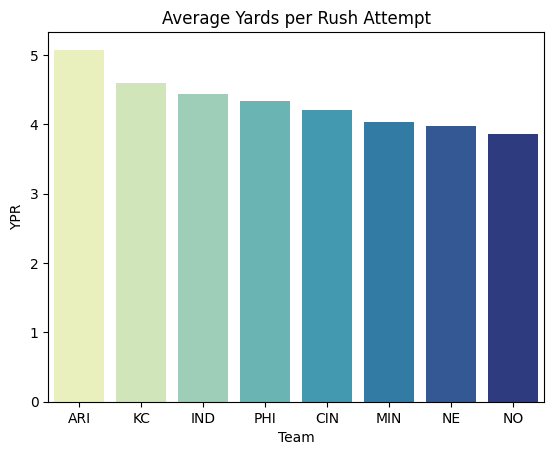

,Team,YPR
7,ARI,5.074627
2,KC,4.599606
1,IND,4.441113
4,PHI,4.340425
0,CIN,4.204360
5,MIN,4.038760
3,NE,3.975669
6,NO,3.862745


In [ ]:
YPR = YardsPerRush(teams, pbp2023)

sns.barplot(x = 'Team', y = 'YPR', data = YPR, palette= 'YlGnBu')
plt.title('Average Yards per Rush Attempt')
plt.show()

YPR

The teams that improved their run game from 2022 to 2023 were the Cardinals, Colts, and Bengals. The biggest improvement was made by the Cardinals who went from 4.3 ypr to 5.1 ypr.

##Play Type Percentage

In [ ]:
PlayTypePercentage(teams, pbp2023)

,Team,Pass Play Frequency,Run Play Frequency
5,MIN,0.487734,0.279221
0,CIN,0.482234,0.266135
2,KC,0.470012,0.292388
3,NE,0.456259,0.309955
6,NO,0.444061,0.316989
1,IND,0.427586,0.322069
7,ARI,0.426044,0.331918
4,PHI,0.424785,0.342611


Most of the playstyles stayed the same, but the Cardinals ran the ball more frequently in 2023. This can probably be explained by Kyler Muarry suffering a season ending injury last year.

#Major Takeaways

The major takeaways for this analysis are that the Chiefs have both an effective pass and run game, and this has lead them to back-to-back Superbowl wins. A general takeaway is that most of my teams did not change their playstyle very much from the 2022 season to the 2023 season. This leads me to believe that thir playstyles will be much of the same in 2024.

#Alignment with Research

The statistics examined in this notebook definitely flesh out why each team preformed the way they did the last two seasons, so in that regard this week's analysis compliments last week's analysis. The playstyle of each offense also can help explain why experts are predicting which teams will have success and which probably won't.